In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Univariate Analysis**

In [2]:
# Reading data from csvs
org_df = pl.read_csv("/kaggle/input/organizations-csv/organizations.csv")
desc_df = pl.read_csv("/kaggle/input/organizations-csv/organization_descriptions.csv")

In [3]:
org_df.head()

uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,domain,homepage_url,country_code,state_code,region,city,address,postal_code,status,short_description,category_list,category_groups_list,num_funding_rounds,total_funding_usd,total_funding,total_funding_currency_code,founded_on,last_funding_on,closed_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits
str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64
"""e1393508-30ea-8a36-3f96-dd3226…","""Wetpaint""","""organization""","""wetpaint""","""https://www.crunchbase.com/org…",167617,"""2007-05-25 13:51:27""","""2023-08-01 00:01:37""",null,"""company""","""wetpaint.com""","""http://www.wetpaint.com/""","""USA""","""NY""","""New York""","""New York""","""902 Broadway 11th Floor New""","""10010""","""acquired""","""Wetpaint offers an online soci…","""Publishing,Social Media,Social…","""Content and Publishing,Interne…",3,39750000,39750000,"""USD""","""2005-06-01""","""2008-05-19""",null,"""51-100""","""info@wetpaint.com""","""206-859-6300""","""https://www.facebook.com/Wetpa…","""https://www.linkedin.com/compa…","""https://twitter.com/wetpainttv""","""https://images.crunchbase.com/…",null,null,null,"""company""",null
"""bf4d7b0e-b34d-2fd8-d292-6049c4…","""Zoho""","""organization""","""zoho""","""https://www.crunchbase.com/org…",168555,"""2007-05-26 02:30:28""","""2023-10-19 07:46:32""","""Zoho Corporation Pvt. Ltd.""","""investor,company""","""zoho.com""","""https://www.zoho.com""","""USA""","""CA""","""California""","""Pleasanton""","""4141 Hacienda Dr""","""94588""","""operating""","""Zoho offers a suite of busines…","""Cloud Computing,Collaboration,…","""Administrative Services,Apps,I…",null,null,null,null,"""1996-03-17""",null,null,"""10000+""","""sales@zohocorp.com""","""1800 103 1123 /1800 572 3535""","""http://www.facebook.com/zoho""","""https://www.linkedin.com/compa…","""http://twitter.com/zoho""","""https://images.crunchbase.com/…",null,null,null,"""company""",2
"""5f2b40b8-d1b3-d323-d81a-b7a8e8…","""Digg""","""organization""","""digg""","""https://www.crunchbase.com/org…",25570,"""2007-05-26 03:03:23""","""2024-01-26 08:06:40""","""Digg Holdings, LLC""","""company""","""digg.com""","""http://www.digg.com""","""USA""","""NY""","""New York""","""New York""",null,null,"""acquired""","""Digg Inc. operates a website t…","""Internet,Social Media,Social N…","""Internet Services,Media and En…",6,49000000,49000000,"""USD""","""2004-10-11""","""2016-09-13""",null,"""51-100""","""feedback@digg.com""",null,"""http://www.facebook.com/digg""","""http://www.linkedin.com/compan…","""http://twitter.com/digg""","""https://images.crunchbase.com/…",null,null,null,"""company""",null
"""f4d5ab44-058b-298b-ea81-380e6e…","""Omidyar Network""","""organization""","""omidyar-network""","""https://www.crunchbase.com/org…",30539,"""2007-05-26 03:21:34""","""2023-08-30 02:27:06""",null,"""investor,company""","""omidyar.com""","""http://www.omidyar.com""","""USA""","""CA""","""California""","""Redwood City""","""1991 Broadway Suite 200""","""94063""","""operating""","""Omidyar Network is an investme…","""Enterprise Software,Financial …","""Financial Services,Lending and…",null,null,null,null,"""2004-01-01""",null,null,"""101-250""","""info@omidyar.com""","""650.482.2500""","""http://www.facebook.com/Omidya…","""http://www.linkedin.com/compan…","""http://twitter.com/OmidyarNetw…","""https://images.crunchbase.com/…",null,null,null,"""investor""",62
"""df662812-7f97-0b43-9d3e-12f64f…","""Meta""","""organization""","""facebook""","""https://www.crunchbase.com/org…",119,"""2007-05-26 04:22:15""","""2023-11-27 12:05:27""","""Meta Platforms, Inc.""","""investor,company""","""meta.com""","""https://meta.com""","""USA""","""CA""","""California""","""Menlo Park""","""1 Hacker Way""","""94025""","""ipo""","""Meta is

In [4]:
desc_df.head()

uuid,name,type,permalink,cb_url,rank,created_at,updated_at,description
str,str,str,str,str,i64,str,str,str
"""e1393508-30ea-8a36-3f96-dd3226…","""Wetpaint""","""organization""","""wetpaint""","""https://www.crunchbase.com/org…",167617,"""2007-05-25 13:51:27""","""2023-08-01 00:01:37""","""Wetpaint is a technology platf…"
"""bf4d7b0e-b34d-2fd8-d292-6049c4…","""Zoho""","""organization""","""zoho""","""https://www.crunchbase.com/org…",168555,"""2007-05-26 02:30:28""","""2023-10-19 07:46:32""","""Zoho offers a suite of busines…"
"""5f2b40b8-d1b3-d323-d81a-b7a8e8…","""Digg""","""organization""","""digg""","""https://www.crunchbase.com/org…",25570,"""2007-05-26 03:03:23""","""2024-01-26 08:06:40""","""Digg Inc. operates a website t…"
"""f4d5ab44-058b-298b-ea81-380e6e…","""Omidyar Network""","""organization""","""omidyar-network""","""https://www.crunchbase.com/org…",30539,"""2007-05-26 03:21:34""","""2023-08-30 02:27:06""","""Pierre Omidyar, the founder of…"
"""df662812-7f97-0b43-9d3e-12f64f…","""Meta""","""organization""","""facebook""","""https://www.crunchbase.com/org…",119,"""2007-05-26 04:22:15""","""2023-11-27 12:05:27""","""Meta is a social technology co…"


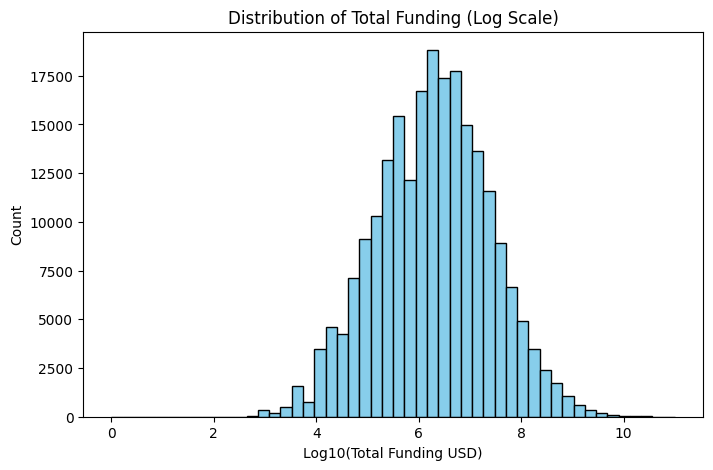

In [5]:
#Task-1
# Ploting total_funding_usd on log scale

# Filter out nulls and zeros
funding = org_df.select("total_funding_usd").drop_nulls().filter(pl.col("total_funding_usd") > 0)

# Log-transform
funding_log = funding.with_columns(
    (pl.col("total_funding_usd").log10()).alias("log_funding")
)

# Convert to numpy for plotting
values = funding_log["log_funding"].to_numpy()

plt.figure(figsize=(8, 5))
plt.hist(values, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Log10(Total Funding USD)")
plt.ylabel("Count")
plt.title("Distribution of Total Funding (Log Scale)")
plt.show()

/tmp/ipykernel_13/3475441338.py:16: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count()


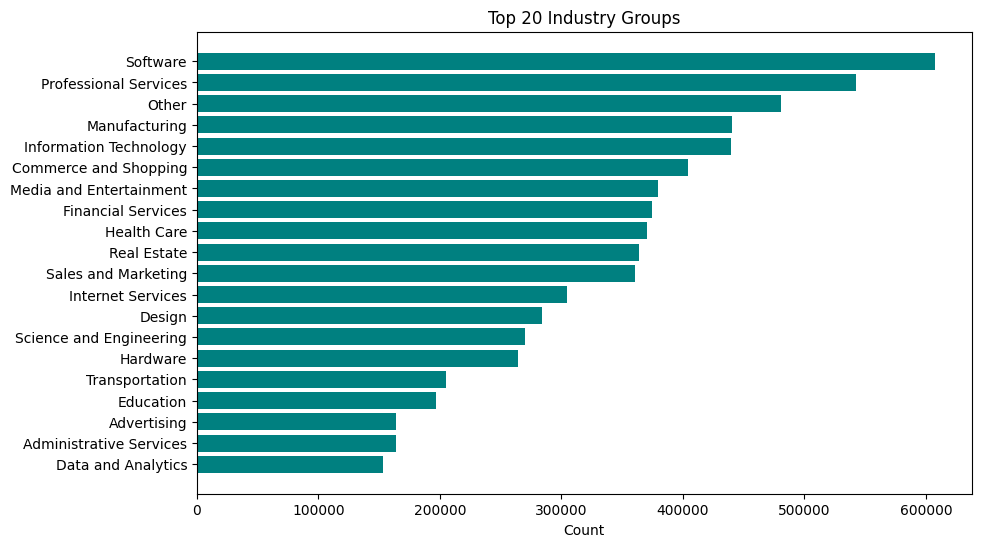

In [6]:
#Task-2
# Plotting the most frequent industry trends

# Split and explode
categories = (
    org_df.select("category_groups_list")
    .drop_nulls()
    .with_columns(pl.col("category_groups_list").str.split(","))
    .explode("category_groups_list")
    .with_columns(pl.col("category_groups_list").str.strip_chars())  # remove spaces
)

# Count top 20
top_categories = (
    categories.group_by("category_groups_list")
    .count()
    .sort("count", descending=True)
    .head(20)
)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_categories["category_groups_list"], top_categories["count"], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.title("Top 20 Industry Groups")
plt.show()

**Bivariate Analysis**

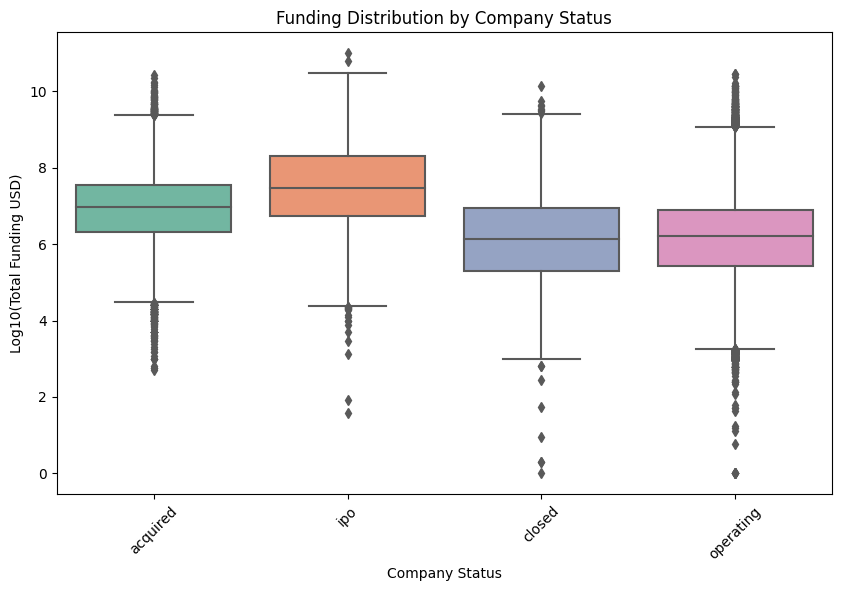

In [7]:
#Task-3
# Plotting boxplot for usd funding across different status types

# Preparing data
box_data = (
    org_df.select(["status", "total_funding_usd"])
    .drop_nulls()
    .filter(pl.col("total_funding_usd") > 0)
    .with_columns((pl.col("total_funding_usd").log10()).alias("log_funding"))
    .to_pandas() #Converting to pandas for plotting as polars cannot be plotted directly
)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=box_data, x="status", y="log_funding", palette="Set2")
plt.xlabel("Company Status")
plt.ylabel("Log10(Total Funding USD)")
plt.title("Funding Distribution by Company Status")
plt.xticks(rotation=45)
plt.show()

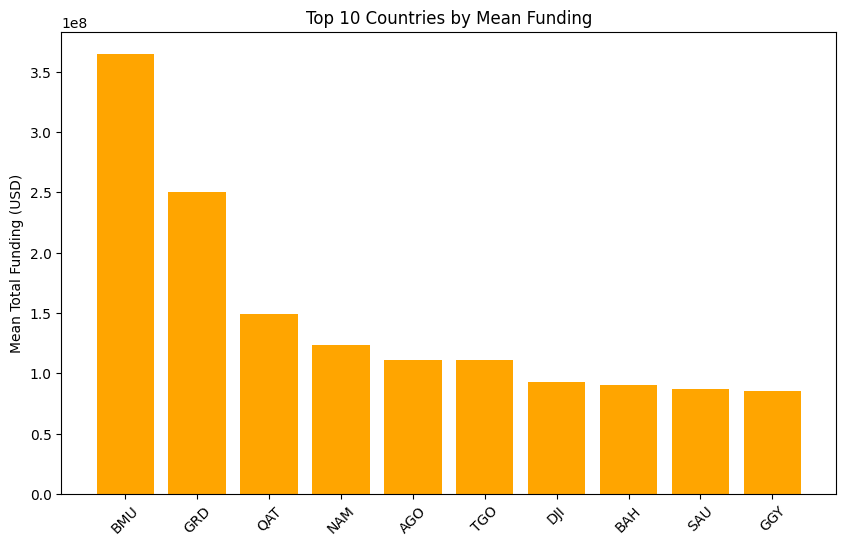

In [8]:
#Task-4
# Plotting mean funding for top 10 country codes
# Group by country and get mean
country_mean = (
    org_df.select(["country_code", "total_funding_usd"])
    .drop_nulls()
    .group_by("country_code")
    .agg(pl.mean("total_funding_usd").alias("mean_funding"))
    .sort("mean_funding", descending=True)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(country_mean["country_code"], country_mean["mean_funding"], color='orange')
plt.ylabel("Mean Total Funding (USD)")
plt.title("Top 10 Countries by Mean Funding")
plt.xticks(rotation=45)
plt.show()
